In [1]:
import sys
sys.path.append("..")

import dataset
import numpy as np
import util

from midi_unit import *

In [2]:
print(f"{NUM_MIDI_KEYS=}({MIN_MIDI_KEY} ~ {MAX_MIDI_KEY})")
print(f"{NUM_PITCHES=}") 

NUM_MIDI_KEYS=128(0 ~ 127)
NUM_PITCHES=12


In [3]:
# correct case
note1 = MIDINote(1, 12.3)
note2 = MIDINote(10, 1.23)
note3 = MIDINote(100, 123)

print(note1, note1.is_note())  # Note(1, 12.30), True
print(MIDIRest(), MIDIRest().is_note())  # Rest, False
print(MIDIRest() is MIDIRest())  # True (i.e., MIDIRest is singleton)

Note(1, 12.3) True
Rest False
True


In [4]:
# error
error = MIDINote(1, -12.3)  # throw ValueError

ValueError: 

In [5]:
sequence1 = MIDIUnitSequence()
sequence1.append(note1)
sequence1.append(note2)
sequence1.append(note3)

sequence2 = MIDIUnitSequence()
sequence2.append(MIDIRest())

sequence3 = MIDIUnitSequence()
sequence3.append(note3)
sequence3.append(note2)
sequence3.append(note1)

print(sequence1)  # [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]

[Note(1, 12.3), Note(10, 1.23), Note(100, 123.0)]


In [6]:
sequence_list = MIDIUnitSeqList()
sequence_list.append(sequence1)
sequence_list.append(sequence2)
sequence_list.append(sequence3)

# [[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)], [Rest], [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]]
print(sequence_list)

#  [[Rest], [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]]
print(sequence_list[1:])

[[Note(1, 12.3), Note(10, 1.23), Note(100, 123.0)], [Rest], [Note(100, 123.0), Note(10, 1.23), Note(1, 12.3)]]
[[Rest], [Note(100, 123.0), Note(10, 1.23), Note(1, 12.3)]]


In [7]:
generator = dataset.new_generator(root="../../dataset/newbie-dataset/", slice_duration=5, mark_onset=False, shuffle=False)

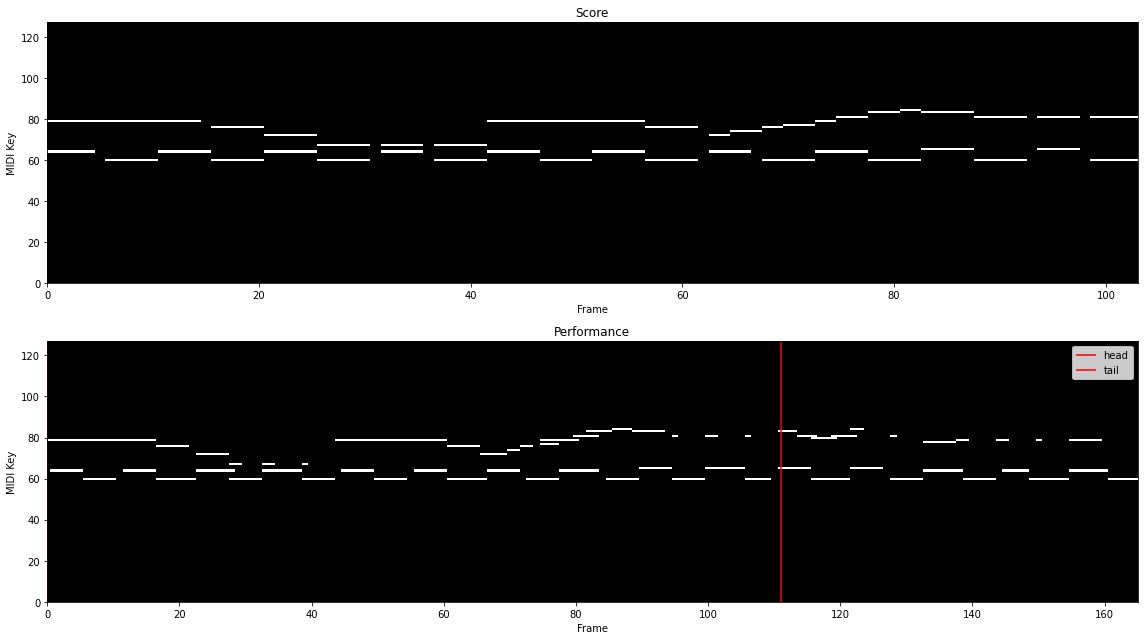

In [8]:
score, perf, (head, tail) = next(generator)
util.plot_midi_matrices(score, perf, (head, tail))

In [9]:
score_sequence_list = MIDIUnitSeqList.from_midi_matrix(score)
print(score_sequence_list)

[[Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(79, 1.0)], [Note(60, 1.0), Note(79, 1.0)], [Note(60, 1.0), Note(79, 1.0)], [Note(60, 1.0), Note(79, 1.0)], [Note(60, 1.0), Note(79, 1.0)], [Note(60, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0), Note(79, 1.0)], [Note(64, 1.0)], [Note(60, 1.0), Note(76, 1.0)], [Note(60, 1.0), Note(76, 1.0)], [Note(60, 1.0), Note(76, 1.0)], [Note(60, 1.0), Note(76, 1.0)], [Note(60, 1.0), Note(76, 1.0)], [Note(64, 1.0), Note(72, 1.0)], [Note(64, 1.0), Note(72, 1.0)], [Note(64, 1.0), Note(72, 1.0)], [Note(64, 1.0), Note(72, 1.0)], [Note(64, 1.0), Note(72, 1.0)], [Note(60, 1.0), Note(67, 1.0)], [Note(60, 1.0), Note(67, 1.0)], [Note(60, 1.0), Note(67, 1.0)], [Note(60, 1.0), Note(67, 1.0)], [Note(60, 1.0), Note(67, 1.0)], [Rest], [Note(64, 1.0), Note(67, 1.0)

In [10]:
score2 = score_sequence_list.to_midi_matrix(set_velocity=False)
print(f"score1==score2 = {np.sum(score - score2) == 0}")

score1==score2 = True


In [11]:
print(score_sequence_list.pitch_histogram)
print(score_sequence_list.repr_sequence)

[0.3025641  0.         0.01538462 0.         0.25641027 0.06153846
 0.         0.23589744 0.         0.08717949 0.         0.04102564]
[Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(64, 1.0), Note(76, 1.0), Note(76, 1.0), Note(76, 1.0), Note(76, 1.0), Note(76, 1.0), Note(72, 1.0), Note(72, 1.0), Note(72, 1.0), Note(72, 1.0), Note(72, 1.0), Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Rest, Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Rest, Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Note(67, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(79, 1.0), Note(76, 1.0), Note(76, 1.0

In [12]:
# pitch_histogram nan test
empty_sequence_list = MIDIUnitSeqList.from_midi_matrix(np.zeros((128, 1)))
print(empty_sequence_list)  # [[Rest]]
print(empty_sequence_list.pitch_histogram)  # [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[Rest]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
